# Import Modules


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
import pickle

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_telecom_dataframe import Telecom
from plot_telecom_dataframe import TelecomPlotter

plot = TelecomPlotter()
cleaner = Telecom()

## Read CSV Data

In [4]:
telecom_cleaned_df = pd.read_csv("../data/telecom_cleaned_data.csv")

In [5]:
#select relevant columns to analyze user engagment
telecom_engagement_df = telecom_cleaned_df[['MSISDN/Number','Bearer Id', 'Dur (ms)', 'Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
telecom_engagement_df

,MSISDN/Number,Bearer Id,Dur (ms),Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
0,33664962239,-9223372036854775808,1.823653e+09,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,33681854413,-9223372036854775808,1.365104e+09,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,33760627129,-9223372036854775808,1.361763e+09,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,33699795932,-9223372036854775808,1.089009e+09,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0
4,33665368271,-9223372036854775808,1.035262e+09,118487293.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0
...,...,...,...,...,...,...,...,...,...,...,...
138066,33645655643,-9223372036854775808,1.135452e+08,922173944.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0
138067,33650688697,7277825670196679680,8.123076e+07,631804110.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0
138068,33663449963,7349883264234609664,9.797070e+07,705783925.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0
138069,33621890103,-9223372036854775808,9.824953e+07,627698629.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0


In [6]:
# Group the dataframe with Number(User)
telecom_engagement_df = telecom_engagement_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
telecom_engagement_df = telecom_engagement_df.rename(
    columns={'Bearer Id': 'number of xDR Sessions'})
telecom_engagement_df

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33601001722,1,116720140.0,8.786906e+08
33601001754,1,181230963.0,1.568596e+08
33601007832,1,49878024.0,4.223207e+08
33601008617,2,37104453.0,1.457411e+09
33601010682,2,253983077.0,6.152172e+08
...,...,...,...
33789960306,1,157069852.0,7.102876e+08
33789967113,1,160461578.0,2.081231e+08
33789996170,1,8810688.0,7.146416e+08


# Top 10 Numbers with highest number of xDR Sessions

In [7]:
telecom_engagement_df.sort_values('number of xDR Sessions',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33626320676,18,8.791937e+09,7.971167e+09
33625779332,17,1.855376e+10,8.499621e+09
33614892860,17,9.966906e+09,8.846226e+09
33659725664,16,4.035436e+09,7.705863e+09
33675877202,15,4.865954e+09,7.891111e+09
33760536639,15,9.279442e+09,8.514774e+09
33667163239,13,8.744922e+09,5.618394e+09
33604515716,12,5.207995e+09,5.487855e+09
33603127838,12,6.287767e+09,4.976195e+09


# Top 10 Numbers with highest number of Duration


In [8]:
telecom_engagement_df.sort_values('Dur (ms)',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33625779332,17,1.855376e+10,8.499621e+09
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33626320676,18,8.791937e+09,7.971167e+09
33667163239,13,8.744922e+09,5.618394e+09
33603127838,12,6.287767e+09,4.976195e+09
33667456716,6,5.649885e+09,2.600522e+09
33604515716,12,5.207995e+09,5.487855e+09
33698792269,11,5.169134e+09,6.540899e+09


# Top 10 Numbers with highest number of total Data Volume


In [9]:
telecom_engagement_df.sort_values('Total Data Volume (Bytes)',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33625779332,17,1.855376e+10,8.499621e+09
33626320676,18,8.791937e+09,7.971167e+09
33675877202,15,4.865954e+09,7.891111e+09
33659725664,16,4.035436e+09,7.705863e+09
33666464084,11,4.536764e+09,7.308501e+09
33664712899,11,2.927790e+09,6.872018e+09
33698792269,11,5.169134e+09,6.540899e+09


# Dataframe Normalzation

In [10]:
selected_metrics = telecom_engagement_df
scale_data = StandardScaler().fit_transform(selected_metrics)
scale_data

array([[-0.49203077, -0.15370369,  0.3859319 ],
       [-0.49203077,  0.20223377, -1.09205693],
       [-0.49203077, -0.52250403, -0.54851071],
       ...,
       [-0.49203077, -0.74909242,  0.05003262],
       [-0.49203077, -0.01980251, -0.42977986],
       [-0.49203077,  0.59838496, -0.19230338]])

In [11]:
normalized_data = normalize(scale_data)
normalized_data

array([[-0.76409062, -0.23869147,  0.59932622],
       [-0.40505194,  0.16648386, -0.89900837],
       [-0.54469765, -0.57843276, -0.60722319],
       ...,
       [-0.5481452 , -0.83452384,  0.05573866],
       [-0.75279737, -0.03029746, -0.6575547 ],
       [-0.61641759,  0.74965842, -0.24091824]])

Text(0.5, 1.0, 'Normalized data')

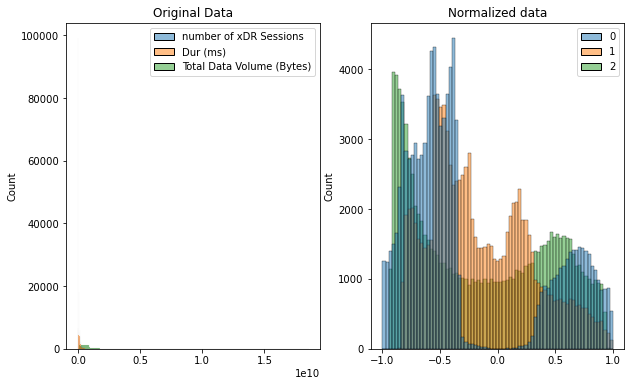

In [12]:
fig, ax=plt.subplots(1,2, figsize=(10, 6))
sns.histplot(selected_metrics, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

# K-Means Clustering 

In [13]:
#We choose 3 as the number of clusters needed 
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [14]:
clustered_telecom_engagement_df = telecom_engagement_df.copy()
clustered_telecom_engagement_df.insert(0, 'Cluster', y_kmeans)
clustered_telecom_engagement_df

,Cluster,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33601001722,2,1,116720140.0,8.786906e+08
33601001754,0,1,181230963.0,1.568596e+08
33601007832,0,1,49878024.0,4.223207e+08
33601008617,1,2,37104453.0,1.457411e+09
33601010682,1,2,253983077.0,6.152172e+08
...,...,...,...,...
33789960306,2,1,157069852.0,7.102876e+08
33789967113,0,1,160461578.0,2.081231e+08
33789996170,2,1,8810688.0,7.146416e+08


In [15]:
clustered_telecom_engagement_df['Cluster'].value_counts()


0    44403
2    27447
1    27265
Name: Cluster, dtype: int64

# Minimum , Maximum , Average and Total of Clusters

In [16]:
min_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'min','Dur (ms)': 'min','Total Data Volume (Bytes)': 'min'})
min_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1,7189000.0,33249009.0
1,1,18235797.0,118487293.0
2,1,7142988.0,545365335.0


<AxesSubplot:ylabel='number of xDR Sessions'>

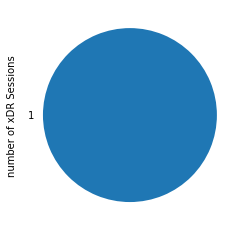

In [17]:
min_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

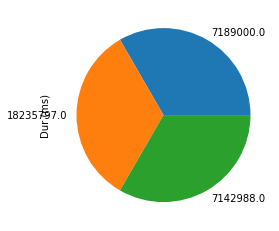

In [18]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:>

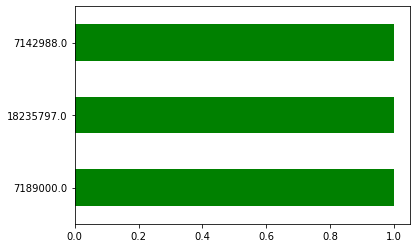

In [19]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='barh',color='green')


<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

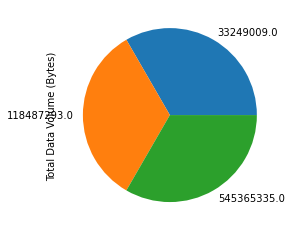

In [20]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

<AxesSubplot:>

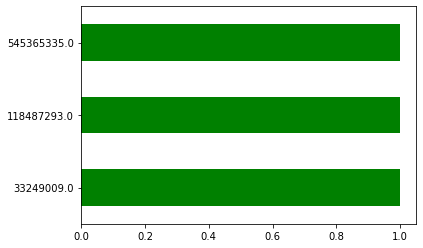

In [21]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh',color='green')

In [22]:
max_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'max','Dur (ms)': 'max','Total Data Volume (Bytes)': 'max'})
max_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,2,7.804715e+08,7.031826e+08
1,18,1.855376e+10,8.846226e+09
2,1,3.327750e+08,9.507607e+08


<AxesSubplot:ylabel='number of xDR Sessions'>

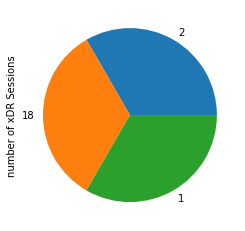

In [23]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:>

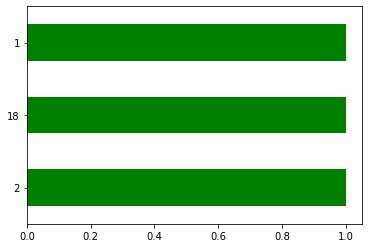

In [24]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='barh',color='green')

<AxesSubplot:ylabel='Dur (ms)'>

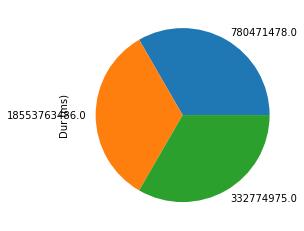

In [25]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:>

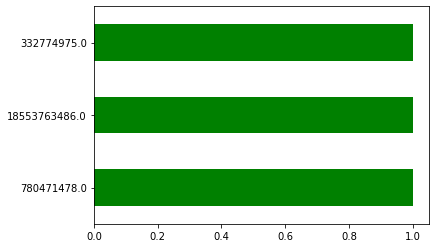

In [26]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='barh',color='green')

<AxesSubplot:>

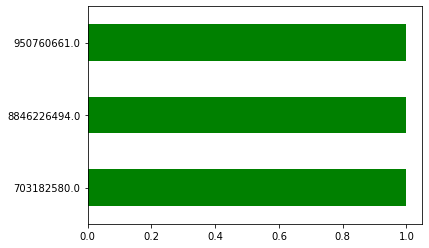

In [27]:
max_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh',color='green')

In [28]:
mean_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'mean','Dur (ms)': 'mean','Total Data Volume (Bytes)': 'mean'})
mean_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1.004865,1.050958e+08,3.342595e+08
1,2.420869,2.618990e+08,1.205571e+09
2,1.000000,9.190706e+07,7.540998e+08


<AxesSubplot:ylabel='number of xDR Sessions'>

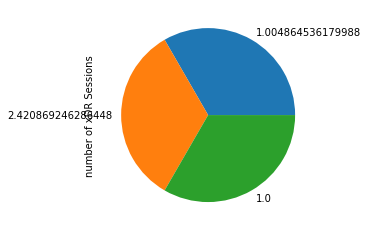

In [29]:
mean_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Dur (ms)'>

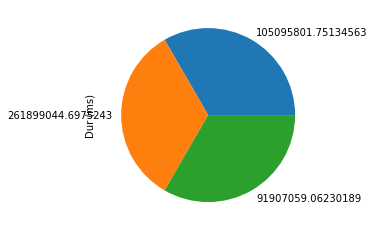

In [30]:
mean_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

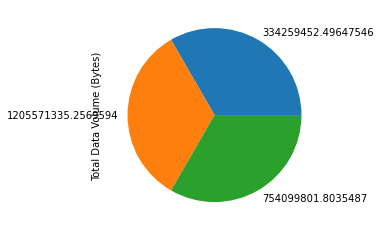

In [31]:
mean_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')


In [32]:
total_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'sum','Dur (ms)': 'sum','Total Data Volume (Bytes)': 'sum'})
total_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,44619,4.666569e+12,1.484212e+13
1,66005,7.140677e+12,3.286990e+13
2,27447,2.522573e+12,2.069778e+13


<AxesSubplot:ylabel='number of xDR Sessions'>

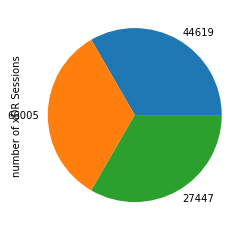

In [33]:
total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:>

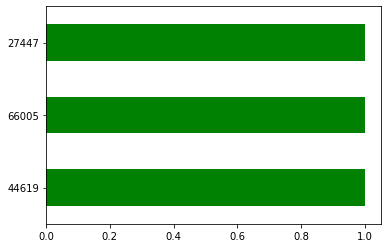

In [34]:
from turtle import color


total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='barh',color='green')


<AxesSubplot:ylabel='Dur (ms)'>

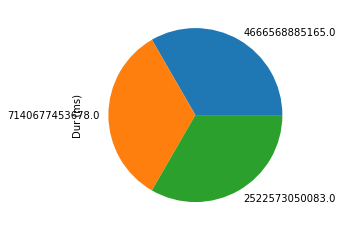

In [35]:
total_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

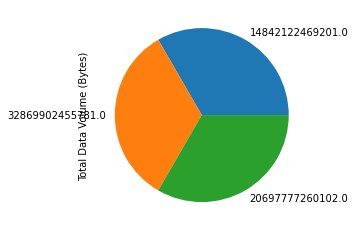

In [36]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')


<AxesSubplot:>

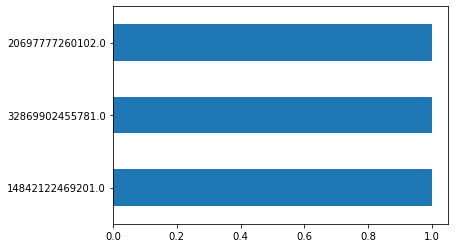

In [37]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh')


In [38]:
telecom_engagement_df.to_csv('../data/telecom_user_engagement_data.csv')


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

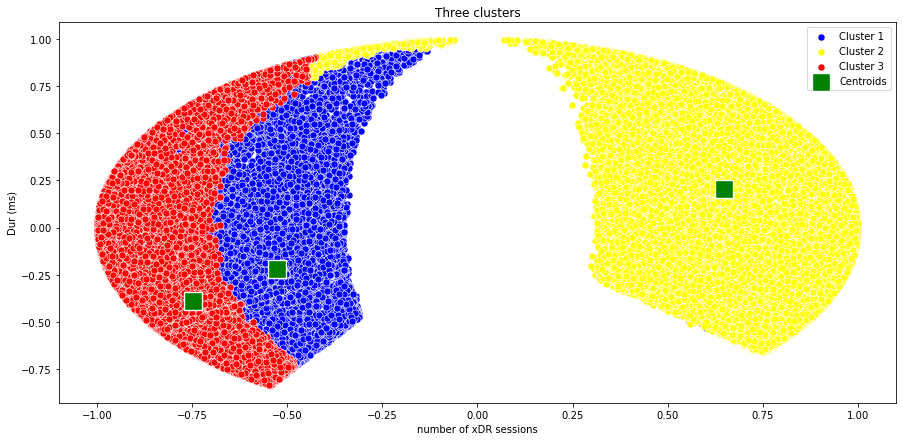

In [44]:
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'yellow', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'green', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Dur (ms)')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

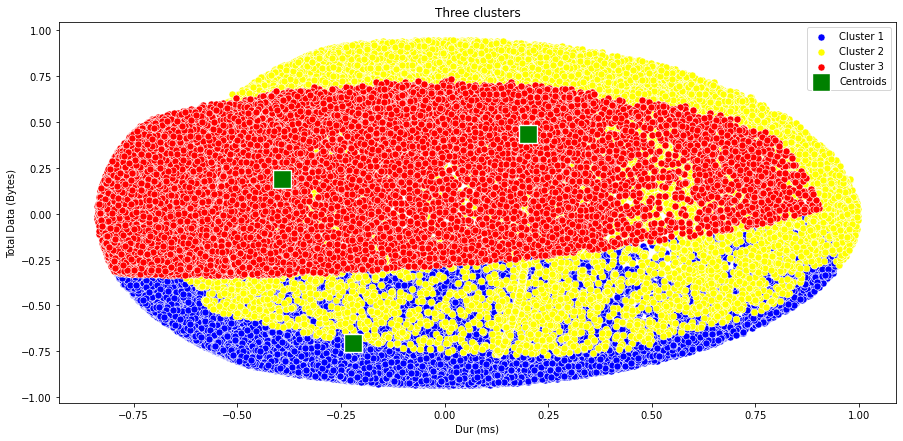

In [45]:
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], color = 'yellow', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color = 'green', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Dur (ms)')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

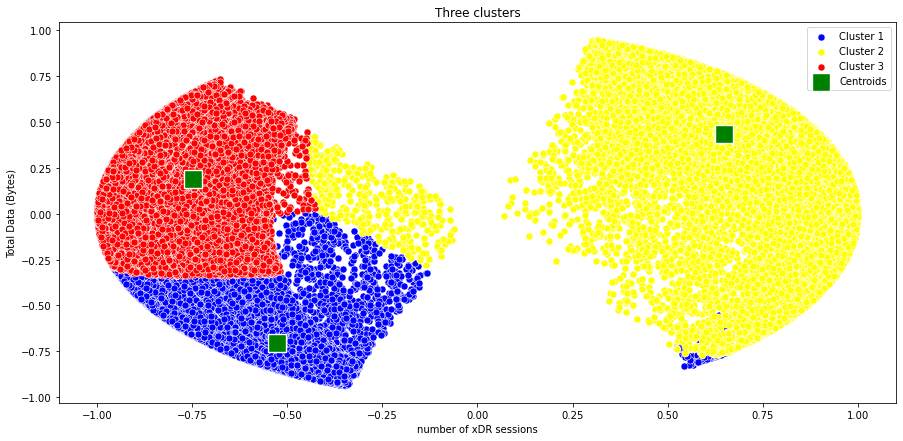

In [46]:
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], color = 'yellow', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color = 'green', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

# Application Engagement Analysis


In [47]:
# choose relevant columns and groupby user (number)
df = telecom_cleaned_df[['MSISDN/Number','Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
app_engagement_df = df.groupby('MSISDN/Number').sum()
app_engagement_df

,Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33601001722,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
33601001754,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
33601007832,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
33601008617,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
33601010682,6.152172e+08,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,492372777.0
...,...,...,...,...,...,...,...,...
33789960306,7.102876e+08,2486946.0,5990586.0,3984626.0,28947763.0,24293718.0,6.386099e+08,712062086.0
33789967113,2.081231e+08,1413370.0,9892882.0,3396607.0,28226479.0,30370302.0,1.348159e+08,408107210.0
33789996170,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0


In [48]:
# Total usage data of each application and total data
apps_sum = app_engagement_df.sum().sort_values(ascending=False)
apps_sum

Total Data Volume (Bytes)           6.840980e+13
Gaming Data Volume (Bytes)          5.937606e+13
Other Data Volume (Bytes)           5.929889e+13
Youtube Data Volume (Bytes)         3.126121e+12
Netflix Data Volume (Bytes)         3.124374e+12
Google Data Volume (Bytes)          1.078049e+12
Email Data Volume (Bytes)           3.118182e+11
Social Media Data Volume (Bytes)    2.523879e+11
dtype: float64

## Optimal value of K

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


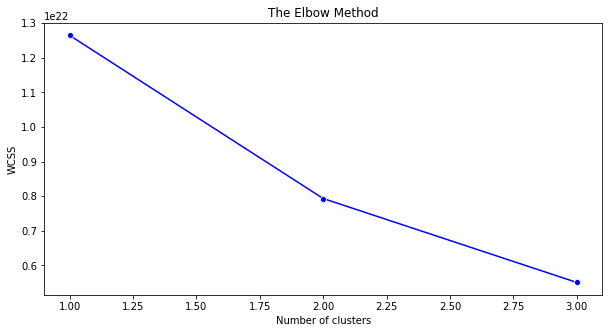

In [51]:
selected_metrics
wcss = []

for i in range(2, 5):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 4), wcss,marker='o',color='blue')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# let check with the given k value 6
kmeans = KMeans(n_clusters = 6, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 3, 2, ..., 0, 3, 5], dtype=int32)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


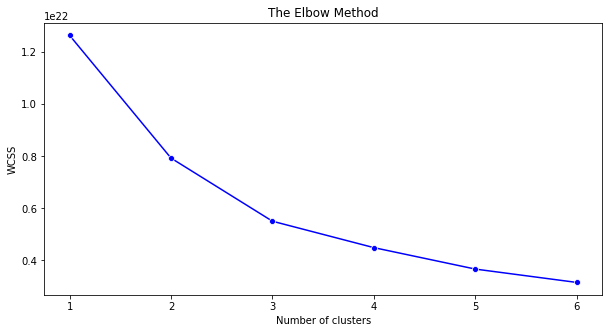

In [53]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 8):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 7), wcss,marker='o',color='blue')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### if we increase the k value we might get somehow better result but 6 is enough

In [55]:
#save the dataframe
clustered_telecom_engagement_df.to_csv('../data/telecom_user_engagement_data.csv')

In [56]:
with open("../models/telecom_user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)